In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import plotly
import plotly.express as px        # A wrapper of plotly
import plotly.graph_objects as go  # Used for plotly in a object oriented way

import cufflinks as cf             # Binds pandas and plotly
import plotly.offline as pyo       # using plotly offline
from plotly.offline import init_notebook_mode,plot,iplot

from plotly.subplots import make_subplots
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

from wordcloud import WordCloud

In [222]:
# reading the cleaned data
df = pd.read_csv("Cleaned_Data.csv")

In [223]:
print ("Shape before dropping the duplicates:{}".format(df.shape))

Shape before dropping the duplicates:(19983, 15)


In [224]:
# dropping duplicates in place
df.drop_duplicates(inplace=True)

In [225]:
print ("Shape after dropping the duplicates:{}".format(df.shape))

Shape after dropping the duplicates:(15992, 15)


In [226]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15992 entries, 0 to 19982
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           15991 non-null  object 
 1   Company         15991 non-null  object 
 2   Experience      15991 non-null  object 
 3   Location        15982 non-null  object 
 4   Tags            15985 non-null  object 
 5   Ratings         11005 non-null  float64
 6   Reviews         11005 non-null  float64
 7   Salary          1222 non-null   object 
 8   Job_Type        10257 non-null  object 
 9   Posted          15991 non-null  object 
 10  Min_Exp_Needed  15991 non-null  object 
 11  Max_Exp_Needed  15988 non-null  object 
 12  Min_Salary      1222 non-null   float64
 13  Max_Salary      1222 non-null   float64
 14  Avg_Sal         1222 non-null   float64
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


In [227]:
# checking the null values in the dataset
(df.isna().sum()/len(df))*100

Title             0.00625
Company           0.00625
Experience        0.00625
Location          0.06253
Tags              0.04377
Ratings          31.18434
Reviews          31.18434
Salary           92.35868
Job_Type         35.86168
Posted            0.00625
Min_Exp_Needed    0.00625
Max_Exp_Needed    0.02501
Min_Salary       92.35868
Max_Salary       92.35868
Avg_Sal          92.35868
dtype: float64

1. Salary, Min_Salary, Max_Salary and Avg_Salary have high percentage of missing values because there was no data available to scrape.
2. Ratings and Reviews also have around 31% missing values as there was no data available to scrape, same with Job_Type variable.
3. Other variables have small but negligible percentage of missing values. 

In [228]:
# checking the first few rows of data
df.head()

,Title,Company,Experience,Location,Tags,Ratings,Reviews,Salary,Job_Type,Posted,Min_Exp_Needed,Max_Exp_Needed,Min_Salary,Max_Salary,Avg_Sal
0,Machine Learning,Wipro Limited,5-10 Yrs,"Hyderabad, Pune, Bengaluru","NLP,Machine Learning,Python,communication,CRF,...",3.80000,12612.00000,NaN,HOT JOB,1,5,10,nan,nan,nan
1,Fresher / Intern Jobs in Machine Learning Proj...,Creative Hands HR Consultancy,0-0 Yrs,"Hyderabad, Ahmedabad, Chennai, Jaipur, Bengalu...","excel,Communication Skills,intern,freshers,Art...",nan,nan,"3,00,000 - 4,00,000",HOT JOB,1,0,0,300000.00000,400000.00000,350000.00000
2,"Senior Software Engineer, Machine Learning",Uber,2-5 Yrs,Bengaluru,"deep learning,Software design,Publishing,Machi...",3.90000,367.00000,NaN,PREMIUM,4,2,5,nan,nan,nan
3,Data Scientist with Machine Learning Job,Adecco India Private Limited,5-10 Yrs,"Hyderabad, Pune, Chennai, Bengaluru","IT Skills,Python,Data Science,Machine Learning...",nan,nan,"11,00,000 - 20,00,000",HOT JOB,1,5,10,1100000.00000,2000000.00000,1550000.00000
4,Python/Data Scientist /AWS /Machine Learning/J...,SECRET TECHNOLOGIES,0-4 Yrs,"Pune, Mumbai","IT Skills,Java,Python,PHP,Testing,Machine Lear...",nan,nan,"2,25,000 - 7,00,000",HOT JOB,0,0,4,225000.00000,700000.00000,462500.00000


### Univariate Analysis

#### Analyzing the Job Type Variable

In [229]:
df['Job_Type'].nunique()

5

1. There are 5 unique Job Types listed.
2. This variable has lot of missing values.
3. "PREFERRED" Job Type seems to be te most common followed by "PREMIUM" and "HOT JOB", "GOVERNMENT" seems to be least common.

In [230]:
df['Job_Type'].value_counts(dropna=False)

NaN           5735
PREFERRED     4430
PREMIUM       4128
HOT JOB       1693
WALK-IN          4
GOVERNMENT       2
Name: Job_Type, dtype: int64

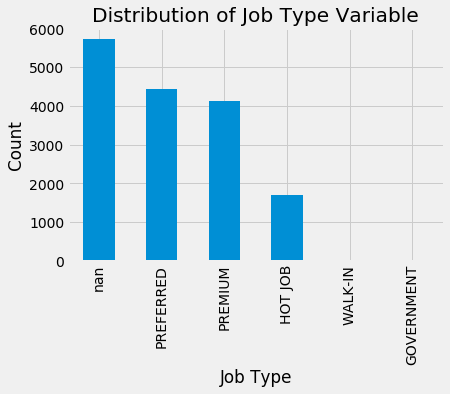

In [231]:
df['Job_Type'].value_counts(dropna=False).plot(kind='bar');
plt.title("Distribution of Job Type Variable");
plt.xlabel("Job Type");
plt.ylabel("Count");

We can see a lot of missing values in this variable. Count of PREFERRED and PREMIUM jobs is almost the same. HOT JOB count is the least. This is dependent on the Job Preference. Walk-Ins and Government Jobs are also lest in terms of the count. 

### Analyzing Experience Variable

Most of the values in the experience variable are of the format "min-max Yrs", but a few of them are not of the same format, hence it makes sense to delete them. Also, some of them have double hyphens between the min and max experience, we need to replace them too. 

In [232]:
# dropping the rows with incorrect experience format
df.drop(df[df['Experience']=="Post Graduation Not Required, BCA, B.Sc/B.Sc(Hons), BA/BA(Hons)"].index,axis=0,inplace=True)
df.drop(df[df['Experience']=="B.Com/B.Com(Hons)"].index,axis=0,inplace=True)
df.drop(df[df['Experience']=="01 January"].index,axis=0,inplace=True)
df.drop(df[df['Experience']=="25 June - 29 June"].index,axis=0,inplace=True)
df.drop(df[df['Experience']=="21 June - 30 June"].index,axis=0,inplace=True)
df.drop(df[df['Experience']=="26 June - 30 June"].index,axis=0,inplace=True)

In [233]:
# replacing the row with incorrect experience format
df['Experience'].replace({"0--1 Yrs":"0-1 Yrs"},inplace=True)

In [234]:
Experience = df['Experience'].value_counts(dropna=False,ascending=False).head(25).to_frame()

In [235]:
# plotting the experience needed
fig = go.Figure(data=[
    go.Bar(x=Experience.index, y=Experience['Experience'],marker_color='blue',marker_line_color='black')])
fig.update_layout(title='Distribution of Experience Required',xaxis=dict(title="Experience"),yaxis=dict(title="Count"))

We can see that 4-6 Years constitutes the majority of the experience needed followed by 6-8 Years and 2-4 Years. 

### Analyzing the Rating Variable

In [236]:
df['Ratings'].describe()

count   11000.00000
mean        3.93103
std         0.42198
min         1.10000
25%         3.90000
50%         4.00000
75%         4.00000
max         5.00000
Name: Ratings, dtype: float64

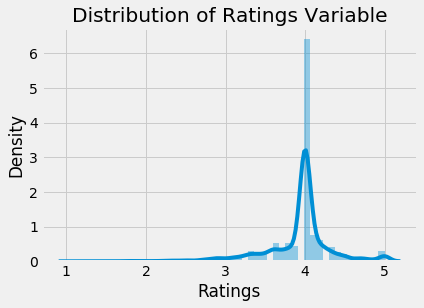

In [237]:
sns.distplot(df['Ratings']);
plt.title("Distribution of Ratings Variable");

1. We can see that there are a lot of missing values in this variable.
2. Average rating seems to be 3.93 which is as good as 4.
3. Majority of the ratings hover around 4. There are a few companies that have rating less than 2. 

In [238]:
# Let's check the number of companies in each bracket of ratings
def ratings_bracket(x):
    if x < 2:
        return "<2"
    elif x >= 2 and x < 3:
        return "2-3"
    elif x >= 3 and x < 4:
        return "3-4"
    else:
        return ">4"
df['Ratings_Bracket'] = df['Ratings'].apply(ratings_bracket)

In [239]:
df.groupby("Ratings_Bracket")['Company'].nunique().sort_values()

Ratings_Bracket
<2       19
2-3     134
3-4     840
>4     2932
Name: Company, dtype: int64

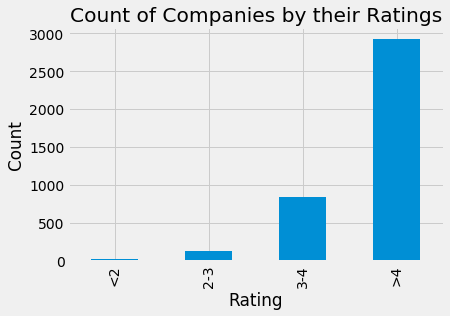

In [240]:
df.groupby("Ratings_Bracket")['Company'].nunique().sort_values().plot.bar();
plt.title("Count of Companies by their Ratings");
plt.xlabel("Rating");
plt.ylabel("Count");

1. We can see that there are very few companies that have rating less than 2. 
2. Majority of te companies have rating greater than 4 followed by rating between 3 to 4. 

### Analyzing Reviews Variable

In [241]:
df['Reviews'].describe()

count   11000.00000
mean     8634.21800
std      8690.10670
min         2.00000
25%        47.00000
50%      3933.00000
75%     18304.00000
max     21955.00000
Name: Reviews, dtype: float64

1. This variables describes the number of ratings provided to a company.
2. We can see that this variable also has a lot of missing values. 
3. The minimum number of reviews provided is 2 and the maximum is 21955. 
4. We can hypothesize that, more the number of reviews provided to a company, more the ratings it gets. We can do some plotting and check this. 

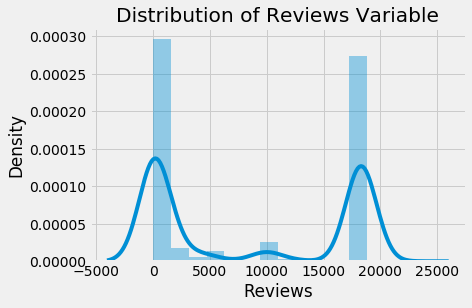

In [242]:
sns.distplot(df['Reviews']);
plt.title("Distribution of Reviews Variable");

1. We can see that the distribution is kind of Bimodal, lot of companies have less than 5000 and btyween 15000 and 20000 reviews. 
2. There are a few companies that have around 10000 reviews. 
3. We had earlier hypothesized that more the number of reviews for a company, more the rating it gets, let's check it with a plot. 

In [243]:
df[['Ratings','Reviews']].corr()

,Ratings,Reviews
Ratings,1.00000,0.15284
Reviews,0.15284,1.00000


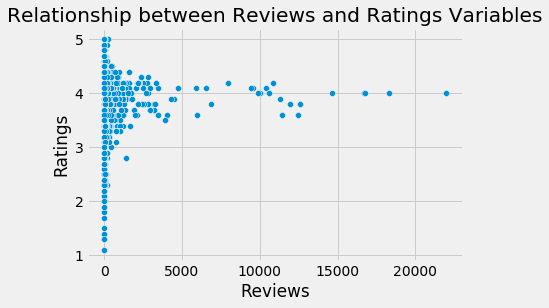

In [244]:
sns.scatterplot(x=df['Reviews'],y=df['Ratings']);
plt.title("Relationship between Reviews and Ratings Variables");
plt.xlabel("Reviews");
plt.ylabel('Ratings');

1. We can see that there is not much relationship between the two variables from the weak correlation value and also from the not so strong scatterplot between the two variables. 
2. We can also see that for a lot of reviews with 0 value, some of the ratings are very high. We can also see that for some companies, wen the number of reviews increase, the rating also reaches around 4. 

### Analyzing the Location Variable

In [285]:
df['Location'].value_counts(dropna=False).head(10)

Bengaluru    6826
Hyderabad    1425
Pune         1408
Mumbai       1022
Chennai       787
Gurugram      629
Anywhere      373
Noida         292
Delhi         238
Kolkata       160
Name: Location, dtype: int64

In [246]:
df['Location'].value_counts(dropna=False).tail(10)

Zirakpur                                                                                    1
Mumbai, Hyderabad, Pune, Gurugram, Chennai, Bengaluru                                       1
Mumbai, Delhi, Pune, Ahmedabad, Jaipur, Vadodara                                            1
Panjim, Goa                                                                                 1
Pune, Ahmedabad                                                                             1
Kolkata, Mumbai, Nagpur, Hyderabad, Pune, Chennai, Bengaluru, Delhi                         1
Puri                                                                                        1
Kolkata, Hyderabad, Pune, Bengaluru, Delhi                                                  1
Guwahati, Silchar, Bhubaneswar, Agartala, Kolkata, Dibrugarh, Asansol, Gangtok, Durgapur    1
Karimganj                                                                                   1
Name: Location, dtype: int64

In [247]:
Locations = list(df.Location.value_counts(dropna=False).head(10).index)
counts = list(df.Location.value_counts(dropna=False).head(10).values)

fig = go.Figure(data=[go.Pie(labels=Locations, values=counts)])
fig.update_layout(title='Top 10 Locations Hiring Data Science Positions in India')
fig.update_traces(hoverinfo='label+percent',marker=dict(line=dict(color='#000000', width=.5)))
fig.show()

1. "Anywhere" in the above pie chart stands for Remote location.
2. We can also see that some of the Openings are in multiple locations, it does not make sense to clean up such data.
3. In General, Bengaluru leads the hiring for Data Science positions in India with more than 50% of the positions, followed by Hyderabad, Pune, Mumbai, Chennai.
4. Delhi, Gurugram and Noida are considered separately, if all 3 are considered as the National Capital Region, the count will be higher, it will rank in the top 4 or 5 cities. 

### Analyzing the Company Variable

In [248]:
# replacing duplicates
df['Company'].replace({"Wipro Limited":"Wipro",
                       "Amazon Development Centre (India) Pvt. Ltd.":"Amazon",
                       "Bigshyft Hiring for Protegrity":"Bigshyft",
                       "Bigshyft Hiring for Avalara":"Bigshyft",
                       "Bigshyft Hiring for Noodle.ai":"Bigshyft",
                       "Bigshyft Hiring for Zymr":"Bigshyft",
                       "BCG":"Boston Consulting Group",
                       "Clarivate Analytics (TRCPL Projects Pvt Ltd.)":"Clarivate Analytics",
                       "DXC Technology India Private Limited":"DXC Technology",
                       "E-con systems India Pvt Ltd":"e-con systems",
                       "e-Hireo Global Pvt Ltd":"eHireo",
                       "Eli Lilly Services India Private Limited":"Eli Lilly and Company",
                       "Kaplan Test Prep":"Kaplan",
                       "Kinaxis India Private Limited":"Kinaxis",
                       "Lera Technologies Pvt.Ltd.":"Lera Technologies Pvt.Ltd",
                       "SAP":"SAP India Pvt.Ltd",
                       "Sutherland Global Services Private Limited":"Sutherland Global Services Inc",
                       "tech mahindra ltd":"Tech Mahindra Ltd.",
                       "Udacity, Inc.":"Udacity",
                       "Varite":"Varite India Pvt. Ltd.",
                       "Wissen Infotech Pvt Ltd":"Wissen",
                       "Zebra Technologies":"Zebra Technologies India Pvt Ltd",
                       "ZS Associates India Pvt Ltd":"ZS Associates",
                       "Wavelabs Technologies Private Limited":"Wavelabs"
                      },inplace=True)

In [249]:
print ("There are {} unique companies hiring for Data Science positions in India.".format(df['Company'].nunique()))

There are 3894 unique companies hiring for Data Science positions in India.


In [250]:
# Let's see the top 20 companies
df['Company'].value_counts(dropna=False).head(20)

Accenture Solutions Pvt Ltd                         4732
IBM India Pvt. Limited                               397
Bajaj Finserv                                        225
ExecBoardinAsia                                      171
Huquo Consulting Pvt. Ltd                            116
Wavelabs                                              91
Qualcomm Technologies, Inc                            83
Catalyst                                              83
Varite India Pvt. Ltd.                                79
Career Maker                                          73
Diverse Lynx                                          73
Larsen & Toubro Infotech Limited                      61
Fractal Analytics                                     56
CareerXperts Consulting                               52
ITC Infotech India Ltd                                51
Luxoft                                                51
Dream11 Inc                                           50
Dell International Services Ind

In [251]:
# Let's see the top 10 companies
df['Company'].value_counts(dropna=False).tail(10)

NorthSouth GIS (India) Pvt. Ltd.          1
BETA CAE SYSTEMS INDIA PRIVATE LIMITED    1
Big.Jobs                                  1
UKB Electronics Pvt. Ltd.                 1
Ossak Infotech                            1
Datrax Services Pvt Ltd                   1
RouteSMS Solutions Ltd                    1
SLK Software Services Private Limited     1
PKF Finance Limited                       1
NaN                                       1
Name: Company, dtype: int64

In [252]:
Companies = list(df.Company.value_counts(dropna=False).head(10).index)
counts = list(df.Company.value_counts(dropna=False).head(10).values)

fig = go.Figure(data=[go.Pie(labels=Companies, values=counts)])
fig.update_layout(title='Top 10 Companies Hiring Data Science Positions in India')
fig.update_traces(hoverinfo='label+percent',marker=dict(line=dict(color='#000000', width=.5)))
fig.show()

1. We can see that Accenture is a bulk recruiter for Data Science related positons in India.
2. IBM and Bajaj Finserv follow Accenture but are significantly less in number as compared to Accenture. 
3. We do not see the top service companies like Infosys , TCS and Wipro in the top 20.
4. We also see some Startups like Flipkart, Dream11, Fractal analytics feature in the top 20 recruiters list (although some of them cannot be considered as startups anymore because they have been operational for long time).

### Analyzing the Title Variable

In [253]:
# creating a new variable to indicate the experience level needed for the job
def fresher_exp(x):
    if "intern" in x.lower():
        return "Fresher"
    elif "internship" in x.lower():
        return "Fresher"
    elif "fresher" in x.lower():
        return "Fresher"
    else:
        return "Experienced"
df['Experience_Level'] = df['Title'].dropna().apply(fresher_exp)

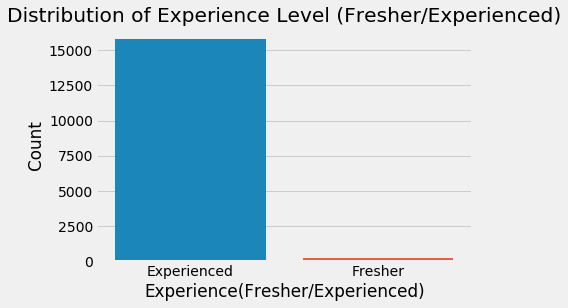

In [254]:
sns.countplot(df['Experience_Level']);
plt.title("Distribution of Experience Level (Fresher/Experienced)");
plt.xlabel("Experience(Fresher/Experienced)");
plt.ylabel("Count");

We can see that the proportion of Jobs for experienced people is way higher than for freshers. 

In [255]:
Title = df['Title'].value_counts(dropna=False,ascending=False).head(15).to_frame()

# plotting the experience needed
fig = go.Figure(data=[
    go.Bar(x=Title.index, y=Title['Title'],marker_color='green',marker_line_color='black')])
fig.update_layout(title='Top 15 Job Titles related to Data Science',xaxis=dict(title="Title"),yaxis=dict(title="Count"))

1. We can see from the bar plot above that Data Scientist and Data Analyst are the top two job titles followed by Spring Boot Application Developer.
2. We can also see that some of the titles do not directly refer to Data Science / Machine Learning and some of them are arbitary, but the skillset needed is for Data Science / Machine Learning domain.
3. Data Engineer also features in top 10 titles, so does Senior Data Scientist. 

### Analyzing the Tags Variable

### Generating WordCloud from Tags

In [256]:
# importing spacy
import spacy
import re
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1500000
# combining all tweets into a single text
combined_tags = ".".join(df.Tags.dropna().values)
combined_tags = re.sub("[,.]"," ",combined_tags)
combined_tags = combined_tags.lower()
# creating doc object
doc = nlp(combined_tags)



# Function to generate word frequencies
def gen_freq(tokens):
    # creating a pandas series with word frequencies, removing stopwords and punctuations
    word_freq = pd.Series([token.text for token in tokens if (token.is_stop==False|token.is_punct==False)]).value_counts()
    # Print frequencies
    print (word_freq[:20])
    return word_freq
word_freq = gen_freq(doc)

data             10243
skills            5141
management        4515
learning          4355
business          4172
machine           3884
analysis          3654
process           3220
sap               2752
development       2545
science           2472
java              2373
communication     2311
analytical        2289
consulting        2268
python            2211
sql               2208
cloud             1956
testing           1954
analytics         1845
dtype: int64


In [257]:
# Function for generating WordCloud
def generate_wordcloud(data):
    # creating a wordcloud
    wc = WordCloud(width=400,height=200,max_words=200,background_color="black").generate_from_frequencies(data)
    
    # setting figure size
    plt.figure(figsize=(14,12))
    
    # Display wordcloud as image
    plt.imshow(wc,interpolation="bilinear")
    
    # removing all axes
    plt.axis("off")
    
    plt.show()

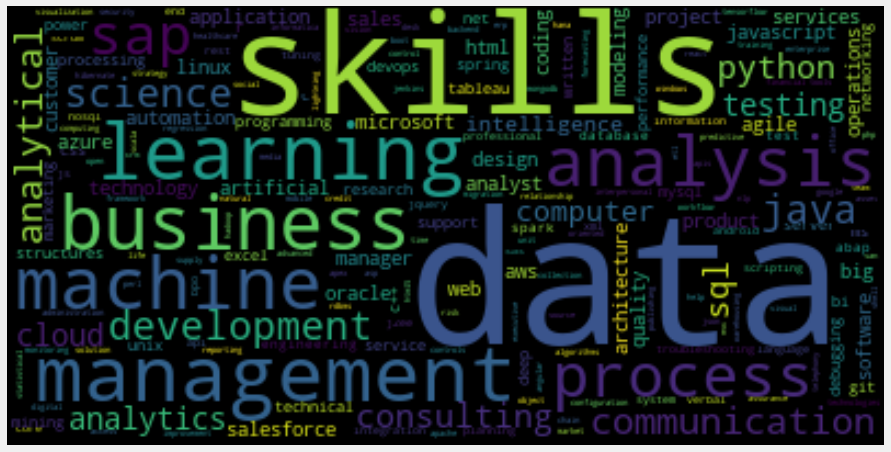

In [258]:
generate_wordcloud(word_freq)

1. We can see some commonly used Programming languages like Python, SQL, Javascript, Java etc. 
2. We can also see Some cloud based platforms such as Azure, Salesforce, AWS etc. 
3. Some of the Business related terms such as Management, Consulting, Communication etc also appear frequently in the Tags. 

In [259]:
Skillset = pd.DataFrame()
Skillset['Skill'] = word_freq.index
Skillset['Count'] = word_freq.values

Let us analyze the Tags variable based on Programming Languages, based on Visualization tools, Big Data Frameworks, Deep Learning tools etc. 

1. Programming Languages: Python, R, SQL, Java, JavaScript, C++, Julia, Scala, SQL etc. 
2. Deep Learning Frameworks: Tensorflow, Pytorch, Keras, Caffe, MXNet etc.
3. Visualization Tools: Tableau, PowerBI, Qlik Sense, Sisense, IBM Cognos, Looker etc.
4. Big Data Frameworks: Hadoop, Spark, Flink, Apache Storm, Hive, etc. 
5. Cloud Platforms: AWS, Azure, Google Cloud, Salesforce, SAP etc.

### Commonly Used Programming Languages

In [260]:
Skillset['Skill'].replace({"pythonalgorithms":"python",
                           "ospython":"python",
                           "pythonagileruby":"python",
                           "perlpython":"python",
                           "c++python":"pyton",
                           "rstudio":"r",
                           "javaproject":"java",
                           "java8":"java",
                           "java5":"java",
                           "applicationsjava":"java",
                           "javascripts":"javascript",
                           "javascriptc":"javascript",
                           "cc++":"c++",
                           "sqls":"sql",
                           "sqle":"sql",
                           "sql4":"sql",
                           "tsql":"sql"},inplace=True)

In [261]:
# Creating a new dataframe for Programming Languages
Programming_Languages = ['python','r','sql','java','javascript','c++','julia','scala',"c"]
Counts = []
Languages = pd.DataFrame()
for lang in Programming_Languages:
    Counts.append(Skillset.loc[Skillset['Skill']==lang]['Count'].values[0])
Languages['Programming_Language'] = Programming_Languages
Languages['Count'] = Counts
Languages.sort_values(by="Count",inplace=True)

In [262]:
# plotting the experience needed
fig = go.Figure(data=[
    go.Bar(x=Languages['Programming_Language'], y=Languages['Count'],marker_color='green',marker_line_color='black')])
fig.update_layout(title='Commonly Used Programming Languages in Data Science',xaxis=dict(title="Language"),yaxis=dict(title="Count"))

### Top 5 Visualization Tools

In [263]:
Skillset['Skill'].replace({"tableauproficient":"tableau"},inplace=True)

In [264]:
# Creating a new dataframe for Programming Languages
Visualization_Tools = ['tableau','powerbi','qliksense','sisense','cognos','looker']
Counts = []
Visualization = pd.DataFrame()
for tool in Visualization_Tools:
    Counts.append(Skillset.loc[Skillset['Skill']==tool]['Count'].values[0])
Visualization['Visualization_Tool'] = Visualization_Tools
Visualization['Count'] = Counts
Visualization.sort_values(by="Count",inplace=True)

In [265]:
# plotting the experience needed
fig = go.Figure(data=[
    go.Bar(x=Visualization['Visualization_Tool'], y=Visualization['Count'],marker_color='green',marker_line_color='black')])
fig.update_layout(title='Top 5 Visualization Tools used in Data Science',xaxis=dict(title="Visualization Tool"),yaxis=dict(title="Count"))

### Top 5 Cloud Platforms

In [266]:
Skillset['Skill'].replace({"aws/":"aws",
                           "aws7":"aws",
                           "azuredevops":"azure",
                           "learningazure":"azure",
                           "google":"googlecloud",
                           "sapd":"sap"},inplace=True)

In [267]:
# Creating a new dataframe for Programming Languages
Cloud_Platforms = ['aws','azure','googlecloud','salesforce','sap']
Counts = []
Platforms = pd.DataFrame()
for platform in Cloud_Platforms:
    Counts.append(Skillset.loc[Skillset['Skill']==platform]['Count'].values[0])
Platforms['Cloud_Platform'] = Cloud_Platforms
Platforms['Count'] = Counts
Platforms.sort_values(by="Count",inplace=True)

In [268]:
# plotting the experience needed
fig = go.Figure(data=[
    go.Bar(x=Platforms['Cloud_Platform'], y=Platforms['Count'],marker_color='green',marker_line_color='black')])
fig.update_layout(title='Top 5 Cloud Platforms used in Data Science',xaxis=dict(title="Cloud Platform"),yaxis=dict(title="Count"))

### Top Deep Learning Frameworks

In [269]:
Skillset['Skill'].replace({"tensorflowg":"tensorflow",
                           "caffe2":"caffe"},inplace=True)

In [270]:
# Creating a new dataframe for Programming Languages
DL_Frameworks = ['tensorflow','pytorch','keras','caffe','mxnet']
Counts = []
Frameworks = pd.DataFrame()
for frameworks in DL_Frameworks:
    Counts.append(Skillset.loc[Skillset['Skill']==frameworks]['Count'].values[0])
Frameworks['DL_Framework'] = DL_Frameworks
Frameworks['Count'] = Counts
Frameworks.sort_values(by="Count",inplace=True)

In [271]:
# plotting the experience needed
fig = go.Figure(data=[
    go.Bar(x=Frameworks['DL_Framework'], y=Frameworks['Count'],marker_line_color='black')])
fig.update_layout(title='Top Deep Learning Frameworks used in Data Science',xaxis=dict(title="DL Framework"),yaxis=dict(title="Count"))

### Top Big Data Frameworks 

In [272]:
Skillset['Skill'].replace({"pyspark":"spark",
                           "sparkml":"spark",
                           "sparksql":"spark",
                           "sparkc":"spark",
                           "hivellap":"hive",
                           "hiveql":"hive"},inplace=True)

In [273]:
# Creating a new dataframe for Programming Languages
BigData_Frameworks = ['hadoop','spark','flink','storm','hive']
Counts = []
BigDataFrameworks = pd.DataFrame()
for bigdataframeworks in BigData_Frameworks:
    Counts.append(Skillset.loc[Skillset['Skill']==bigdataframeworks]['Count'].values[0])
BigDataFrameworks['BigData_Framework'] = BigData_Frameworks
BigDataFrameworks['Count'] = Counts
BigDataFrameworks.sort_values(by="Count",inplace=True)

In [274]:
# plotting the experience needed
fig = go.Figure(data=[
    go.Bar(x=BigDataFrameworks['BigData_Framework'], y=BigDataFrameworks['Count'],marker_line_color='black')])
fig.update_layout(title='Top Big Data Frameworks used in Data Science',xaxis=dict(title="Big Data Framework"),yaxis=dict(title="Count"))

### Commonly Used Python Libraries

Let's also see the commonly used Python libraries for Data Science and Machine Learning

In [275]:
Skillset['Skill'].replace({"scikit":"scikitlearn"},inplace=True)

In [276]:
# Creating a new dataframe for Programming Languages
Python_Libraries = ['numpy','scipy','pandas','keras','scikitlearn','pytorch','tensorflow','matplotlib','seaborn','plotly']
Counts = []
PythonLibraries = pd.DataFrame()
for library in Python_Libraries:
    Counts.append(Skillset.loc[Skillset['Skill']==library]['Count'].values[0])
PythonLibraries['Python_Library'] = Python_Libraries
PythonLibraries['Count'] = Counts
PythonLibraries.sort_values(by="Count",inplace=True)

In [277]:
# plotting the experience needed
fig = go.Figure(data=[
    go.Bar(x=PythonLibraries['Python_Library'], y=PythonLibraries['Count'],marker_line_color='black')])
fig.update_layout(title='Commonly Used Python Libraries',xaxis=dict(title="Python Library"),yaxis=dict(title="Count"))

### Analyzing the Salary Variable

In [284]:
df[['Min_Salary','Max_Salary','Avg_Sal']].describe()

,Min_Salary,Max_Salary,Avg_Sal
count,1219.00000,1219.00000,1219.00000
mean,929060.70550,1527198.52338,1228129.61444
std,867275.97132,1241213.98542,1038017.82852
min,50000.00000,50000.00000,50000.00000
25%,300000.00000,600000.00000,487500.00000
50%,700000.00000,1300000.00000,1000000.00000
75%,1200000.00000,2000000.00000,1550000.00000
max,10000000.00000,10000000.00000,10000000.00000


We can see that a large number of missing values in the Salary variable because the employer did not disclose the salary detail while posting the job requirement. So we have little data to analyze the salary structure in Data Science domain. 

1. We can see from the distribution plot below that, majority of the salaries are between 0 - 20 Lakh per annum on an average.
2. We can see some extreme values too (it can be explored further).
3. The distribution looks like positively skewed which is expected. 

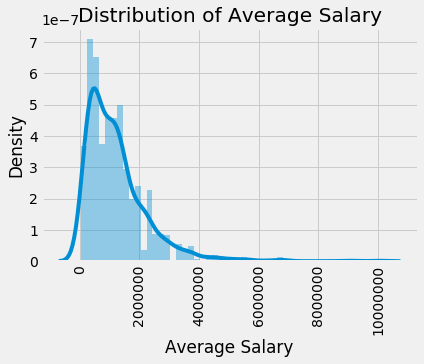

In [279]:
# Let's check the distribution of average salary
sns.distplot(df['Avg_Sal'].dropna());
plt.ticklabel_format(style='plain', axis='x');
plt.xticks(rotation=90);
plt.xlabel("Average Salary");
plt.title("Distribution of Average Salary");

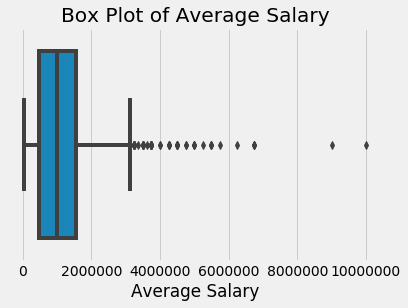

In [281]:
# Let's check the distribution of average salary
sns.boxplot(df['Avg_Sal'].dropna());
plt.ticklabel_format(style='plain', axis='x');
plt.xlabel("Average Salary");
plt.title("Box Plot of Average Salary");